# 동일 데이터에 대한 CNN 적용

Epoch 1/5
1563/1563 [==============================] - 262s 167ms/step - loss: 1.4985 - accuracy: 0.4519 - val_loss: 1.1122 - val_accuracy: 0.6049
Epoch 2/5
1563/1563 [==============================] - 260s 166ms/step - loss: 1.0909 - accuracy: 0.6146 - val_loss: 0.8802 - val_accuracy: 0.6969
Epoch 3/5
1563/1563 [==============================] - 257s 165ms/step - loss: 0.9359 - accuracy: 0.6704 - val_loss: 0.8609 - val_accuracy: 0.6978
Epoch 4/5
1563/1563 [==============================] - 260s 167ms/step - loss: 0.8561 - accuracy: 0.7003 - val_loss: 0.7864 - val_accuracy: 0.7254
Epoch 5/5
313/313 [==============================] - 12s 38ms/step - loss: 0.7570 - accuracy: 0.7397
정답률= 0.7397000193595886 loss= 0.7569882273674011


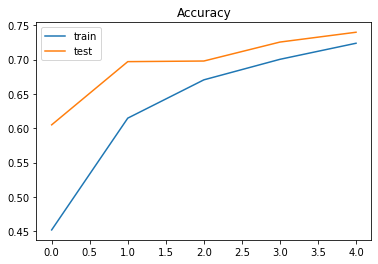

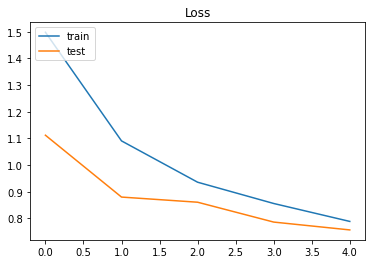

In [ ]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 정규화하기 --- (*2)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=5,
    verbose=1,
    validation_data=(X_test, y_test))

# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
model.save_weights('cifar10-cnn-weight.h5')

# 실습 2
- CNN의 은닉층 구조를 개선해보세요
- epoch를 늘려보세요
- 새롭게 얻은 모형의 가중치를 저장해보세요.